总结：  
jieba.cut(str, cut_all = False) #cut_all 为 False 表示普通模式匹配，默认也是 False   
collections.Counter(*args, **kwds) #统计同一个元素出现的数量，返回一个 Counter(字典)  
Counter.most_common() #按数量从高到低排序，返回一个 list，每个值为 tuple，tuple[0] 是元素，tuple[1] 是数量    
list_str.findall("\w+", str) #按单词划分，返回一个 list，总的来说，就是以任一符号作为分隔符划分整个字符串  
"".join(re.findall("\w+", str(list_str))) #这就相当于把 str 的符号都去掉后，生成的字符串

总结二：  
分词：  
f_write = open("jieba_cut1.txt", "w")
f_open = open('artcle_9k.txt')
for i, line in enumerate(f_open):
    if i % 500 == 0 : print(i)
    if i > 10000 : break    
    f_write.write("\n".join(cut(line)))
f_open.close()
f_write.close()

words_count = Counter(open("jieba_cut1.txt").read().split("\n")) #整体的时间只前面读跟写文件那一块，这一块分割成数组和统计几乎是立即实现的

In [2]:
import jieba

In [3]:
import numpy as np
import random
from random import choice 
import pandas as pd
from collections import Counter

In [4]:
choice(range(100))

95

In [5]:
file= "datasource/sqlResult_1558435.csv"

### 1. pandas read_csv 

从 csv 文件生成 DaraFrame

In [6]:
content = pd.read_csv(file, encoding="gb18030")

In [7]:
content.head(1)

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm


In [8]:
artlist = content['content'].tolist()
num = content.index

In [9]:
print(len(artlist), "\n", num)

89611 
 RangeIndex(start=0, stop=89611, step=1)


### 2. 结巴分词

#### 2.1 执行分词

In [10]:
with_jieba_cut = Counter(jieba.cut(artlist[110], cut_all = False))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\1\AppData\Local\Temp\jieba.cache
Loading model cost 1.511 seconds.
Prefix dict has been built succesfully.


In [11]:
cut_str = "我来自广东省汕尾陆丰市的清华大学"

In [12]:
"/".join(jieba.cut(cut_str, cut_all = False))

'我/来自/广东省/汕尾/陆丰市/的/清华大学'

In [13]:
import re
re.findall("\w+", "abcbad obd\ndfd")

['abcbad', 'obd', 'dfd']

In [14]:
for e in Counter(jieba.cut(artlist[110])):
    #print(e, index)
    #print(e)
    pass
    
#print(with_jieba_cut)

In [15]:
type(Counter(jieba.cut(artlist[110])))

collections.Counter

In [16]:
#jieba.cut?

#### 2.2 获取出现频率前 x 的词

collections.Counter.most_common()

In [17]:
with_jieba_cut.most_common()[:9]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14)]

In [18]:
def token(string):    
    return re.findall('\w+', string)

In [19]:
''.join(token(artlist[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [20]:
articles_clean = [''.join(token(str(a)))for a in artlist]

In [21]:
len(articles_clean)

89611

In [22]:
articles_clean[0]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [23]:
with open('txt_file_for_jieba/artcle_9k.txt', "w") as f:
    for a in articles_clean:
        f.write(a + "\n")

In [24]:
def cut(string):
    return list(jieba.cut(string))

In [25]:
TOKEN = []
f_write = open("txt_file_for_jieba/jieba_cut_artcle_9k.txt", "w")
f_open = open('txt_file_for_jieba/artcle_9k.txt')
for i, line in enumerate(f_open):
    #if i % 10 == 0 : print(i)
    if i > 10000 : break
    #TOKEN += cut(line)
    f_write.write("\n".join(cut(line)))
#f.close()
f_open.close()
f_write.close()

In [30]:
words_list = open("txt_file_for_jieba/jieba_cut_artcle_9k.txt").read().split("\n")
words_count = Counter(words_list)

In [31]:
type(words_count)

collections.Counter

In [32]:
words_count["的"]

184244

In [33]:
Counter(words_count).most_common(5)

[('的', 184244), ('在', 47370), ('了', 36722), ('和', 30809), ('是', 30283)]

In [34]:
fn = [f for w, f in Counter(words_count).most_common(5)]
wn = [w for w, f in Counter(words_count).most_common(5)]
print(fn)

[184244, 47370, 36722, 30809, 30283]


In [35]:
frequiences = [f for w, f in words_count.most_common(100)]

In [36]:
x = [i for i in range(100)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


#### 2.3 用 pyplot 表示不同的词出现的次数

In [37]:
%matplotlib inline

In [38]:
import matplotlib.pyplot as plt

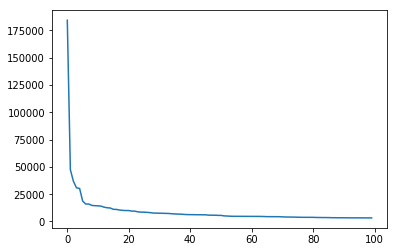

In [39]:
plt.plot(x, frequiences)

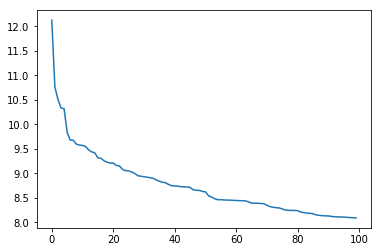

In [40]:
plt.plot(x, np.log(frequiences))

#### 2.4 每个词出现的比例：出现的次数/总词数

In [41]:
def prob_1(word):
    return words_count[word] / len(words_list)

In [42]:
prob_1("但是")

0.0004886491274567478

In [43]:
words_list[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [44]:
words_list_2_gram = ["".join(words_list[i:i+2]) for i in range(len(words_list[:-2]))]

In [45]:
len(words_list_2_gram)

3693855

In [46]:
words_list_2_gram[:5]

['此外自', '自本周', '本周6', '6月', '月12']

In [47]:
words_count_2_gram = Counter(words_list_2_gram)

In [48]:
words_count_2_gram.most_common(25)[:5]

[('6月', 8502), ('nan', 3664), ('2016年', 2773), ('2017年', 2496), ('的是', 2250)]

#### 2.5 两个词在一起出现的频率

In [49]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2_gram : return words_count_2_gram[word1+word2] / len(words_list_2_gram)
    else :
        return 1 / len(words_list_2_gram)

In [50]:
1 / len(words_list_2_gram)

2.7071988478161705e-07

In [51]:
prob_2("我们", "我们") * len(words_list_2_gram)

5.0

In [52]:
prob_2("我们","在")

4.6834540067219745e-05

In [53]:
prob_2("去","吃饭")

2.7071988478161705e-07

In [54]:
prob_2("在","吃饭")

2.7071988478161705e-07

#### 2.5.1 获取一段句子出现的可能性

In [55]:
def get_probability(sentence):
    #先把词分了
    words = cut(sentence)
    # 待返回的概率值
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next = words[i + 1]
        probability = prob_2(words[i], words[i+1])
        sentence_pro *= probability

    return sentence_pro

In [56]:
get_probability("我们在")

4.6834540067219745e-05

In [57]:
get_probability("小明今天抽奖抽到一台苹果手机")

6.298554938443348e-39

In [58]:
get_probability("小明今天抽奖抽到一台波音飞机")

3.9365968365270925e-40

In [59]:
get_probability('洋葱奶昔来一杯')

1.984085894442852e-20

In [60]:
get_probability('养乐多绿来一杯')

7.3289256016172e-14

In [61]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.7051087550551826e-62
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.7051087550551826e-62
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.5995339698348758e-32
---- 真是一只好看的小猫 with probility 5.908446552144404e-26
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 8.333160756659978e-19
---- 今晚火锅去吃我 with probility 1.9336734170654417e-25
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.984085894442852e-20
---- 养乐多绿来一杯 with probility 7.3289256016172e-14


### 3. Python 的一些基本运算

In [62]:
from functools import reduce
from operator import add, mul

In [63]:
reduce(add, [1,2,3,4])

10

In [64]:
[1, 3, 4] + [5, 6, 7]

[1, 3, 4, 5, 6, 7]